In [26]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
import seaborn as sns

from sklearn.preprocessing import StandardScaler

# KNN MEANS

In [29]:
iris=pd.read_csv("D:/Machine Learning Practical/Lab Exercises/LAB 8(K_MEANS)/iris.csv")
iris1=iris.drop("Species",axis=1)
iris1

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [30]:
# standardizing the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris1 = scaler.fit_transform(iris1)

# statistics of scaled data
pd.DataFrame(iris1).describe()

,0,1,2,3
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-2.775558e-16,-9.695948e-16,-8.652338e-16,-4.662937e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


In [31]:
iris1=pd.DataFrame(iris1)
iris1

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


### Elbow method to find the number of clusters K

C:\Users\jesto\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


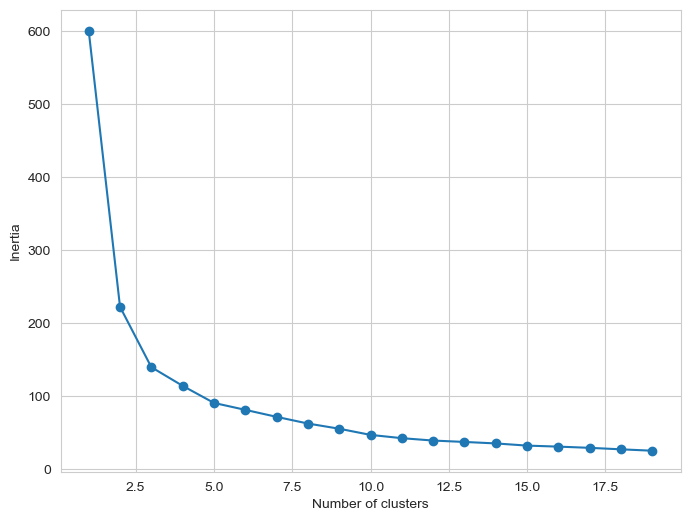

In [33]:
# fitting multiple k-means algorithms and storing the values in an empty list
Inertia = []
for i in range(1,20):
    kmeans = KMeans(n_clusters = i, init='k-means++')
    kmeans.fit(iris1)
    Inertia.append(kmeans.inertia_)
    
# converting the results into a dataframe and plotting them

frame = pd.DataFrame({'Cluster':range(1,20), 'Inertia':Inertia})
plt.figure(figsize=(8,6))
plt.plot(frame['Cluster'], frame['Inertia'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

C:\Users\jesto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cluster', ylabel='Inertia'>

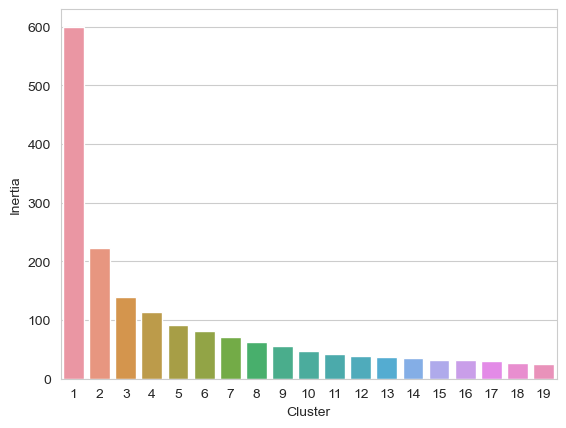

In [34]:
sns.barplot(frame["Cluster"],frame["Inertia"])

#### Interpretation: We see that after 3 or 4 clusters the inertia is not affected much, so we can take either 3 or 4


In [35]:
#lET US FIRST TAKE K=3

kmeans1 = KMeans( n_clusters = 3, init='k-means++')
kmeans1.fit(iris1)
pred_3 = kmeans1.predict(iris1)
pred_3


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [36]:
#The number of clusters when k=3
iris1["Cluster_3"]=pred_3
iris1["Cluster_3"].value_counts()

0    53
1    50
2    47
Name: Cluster_3, dtype: int64

In [37]:
#NOW WE TAKE K=4

kmeans2 = KMeans( n_clusters = 4, init='k-means++')
kmeans2.fit(iris1)
pred_4 = kmeans2.predict(iris1)
pred_4


C:\Users\jesto\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jesto\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([0, 3, 3, 3, 0, 0, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 0, 0, 3, 3, 0, 0, 0, 3, 3, 0, 0, 3, 0, 0, 3, 3, 0,
       0, 3, 0, 3, 0, 3, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [38]:
#The number of clusters when k=3
iris1["Cluster_4"]=pred_4
iris1["Cluster_4"].value_counts()

2    53
1    47
0    26
3    24
Name: Cluster_4, dtype: int64

In [50]:
#Final DataFrame
iris1


,0,1,2,3,Cluster_3,Cluster_4
0,-0.900681,1.019004,-1.340227,-1.315444,1,0
1,-1.143017,-0.131979,-1.340227,-1.315444,1,3
2,-1.385353,0.328414,-1.397064,-1.315444,1,3
3,-1.506521,0.098217,-1.283389,-1.315444,1,3
4,-1.021849,1.249201,-1.340227,-1.315444,1,0
...,...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,2,1
146,0.553333,-1.282963,0.705921,0.922303,0,2
147,0.795669,-0.131979,0.819596,1.053935,2,1
148,0.432165,0.788808,0.933271,1.448832,2,1


In [40]:
#renaming
df=iris1.rename(columns = {0:'Sepal_L',1:'Sepal_W',2:'Petal_L',3:'Petal_W'})
df

,Sepal_L,Sepal_W,Petal_L,Petal_W,Cluster_3,Cluster_4
0,-0.900681,1.019004,-1.340227,-1.315444,1,0
1,-1.143017,-0.131979,-1.340227,-1.315444,1,3
2,-1.385353,0.328414,-1.397064,-1.315444,1,3
3,-1.506521,0.098217,-1.283389,-1.315444,1,3
4,-1.021849,1.249201,-1.340227,-1.315444,1,0
...,...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,2,1
146,0.553333,-1.282963,0.705921,0.922303,0,2
147,0.795669,-0.131979,0.819596,1.053935,2,1
148,0.432165,0.788808,0.933271,1.448832,2,1


### Comparing K=3 and IRIS Original Dataset by Visualization

<Figure size 600x300 with 0 Axes>

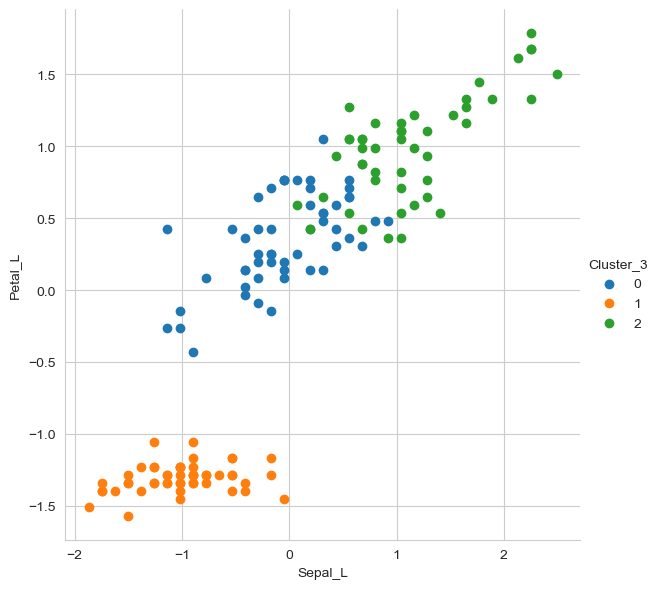

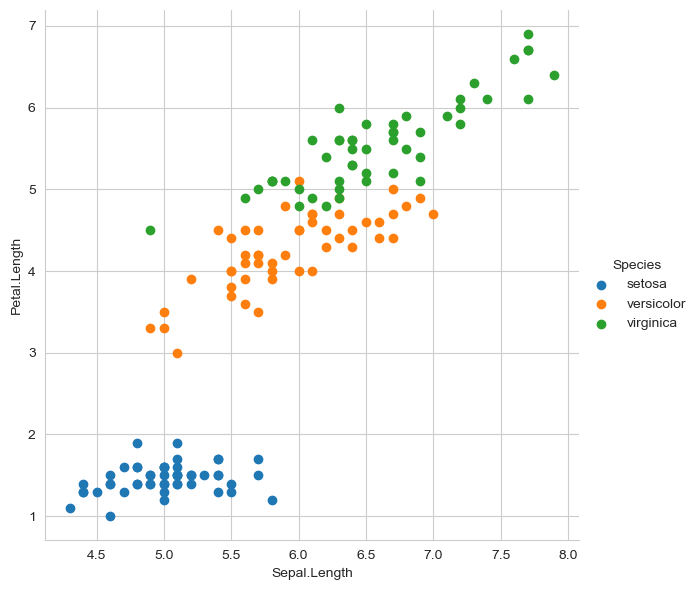

In [48]:
# style used as a theme of graph
# for example if we want black
# graph with grid then write "darkgrid"

plt.figure(figsize=(6, 3))

sns.set_style("whitegrid")
# sepal_length, petal_length are iris
# feature data height used to define
# Height of graph whereas hue store the
# class of iris dataset.
sns.FacetGrid(df, hue ="Cluster_3",
              height = 6).map(plt.scatter,
                              'Sepal_L',
                              'Petal_L').add_legend()
# class of iris dataset.
sns.FacetGrid(iris, hue ="Species",
              height = 6).map(plt.scatter,
                              'Sepal.Length',
                              'Petal.Length').add_legend()

#plt.show()

### Comparing K=4 and IRIS Original Dataset by Visualization

<Figure size 600x300 with 0 Axes>

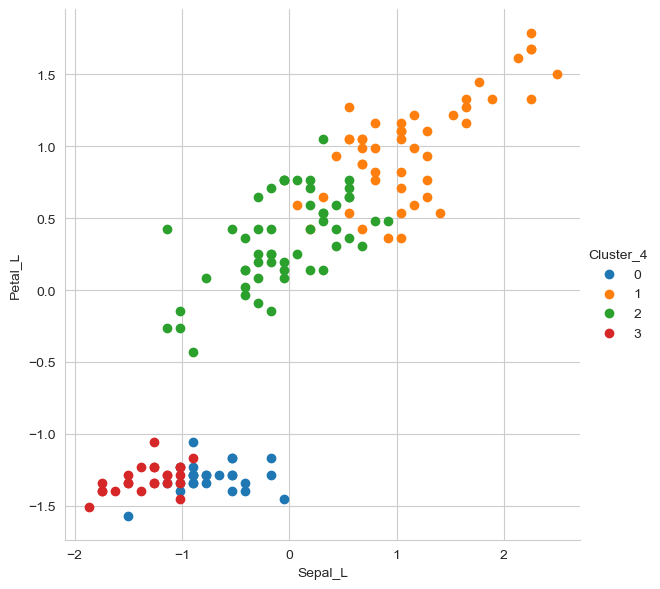

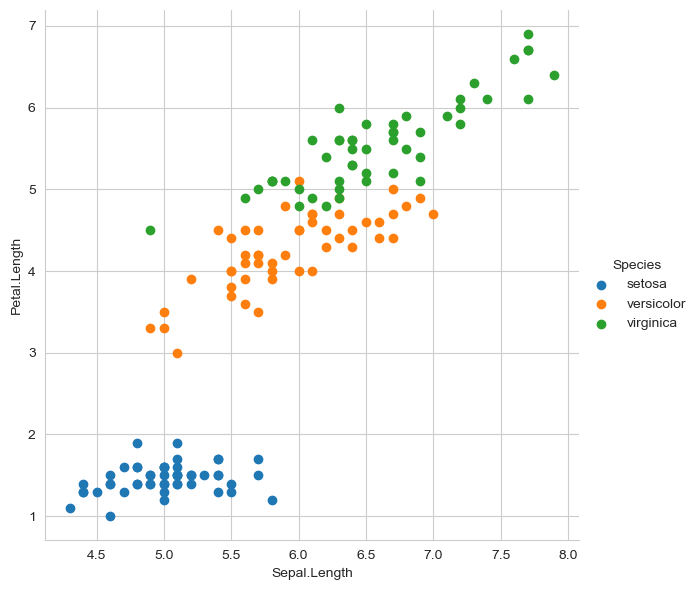

In [49]:


plt.figure(figsize=(6, 3))

sns.set_style("whitegrid")

sns.FacetGrid(df, hue ="Cluster_4",
              height = 6).map(plt.scatter,
                              'Sepal_L',
                              'Petal_L').add_legend()
# class of iris dataset.
sns.FacetGrid(iris, hue ="Species",
              height = 6).map(plt.scatter,
                              'Sepal.Length',
                              'Petal.Length').add_legend()

#plt.show()

## Interpretation: On comparison with original data which had 3 classes ,we see that for k=3, we get the best prediction results.